# Callisto Data Quality Analysis for MNIST-Digit

### Dependencies
* Python 3
* Pickle
* Matplotlib
* Keras
* Numpy

In [1]:

from keras.datasets import mnist
import matplotlib.pyplot as plt
import _pickle as pickle
from keras.utils import to_categorical
import numpy as np



Using TensorFlow backend.


### all_train_acts.pickle contains all the activations of the training data. This is necesscary for Callisto to calculate the shannon indices of the image input. Please download the file [here](https://drive.google.com/file/d/1xyoIpkv-L0SxMyxGnkSZzBd2JkiqTVJi/view?usp=sharing). The file should be saved in the "saved_pickles" folder under MNIST-Digit if you download this file independently. If you have downloaded it as part of the GitHub repo, it should be downloaded automatically

### MD5 checksum = 9a7463549e6301c694759436d3c8010b

In [2]:
with open('../saved_pickles/all_train_acts.pickle', 'rb') as handle: 
     all_acts = pickle.load(handle)

In [3]:
#Importing the training and testing data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train= x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

#Converting the labels to a categorical form
y_train=to_categorical(y_train, num_classes=10)
y_test=to_categorical(y_test, num_classes=10)

In [4]:
# This function calculates the Shannon index for all the inputs
def shannon(arrs):
    shannons = []
    for arr in arrs:
        sum = 0
        for i in arr:
            sum += (i*np.log(i))
        shannons.append(sum * -1.0)
    return shannons

In [5]:
all_shannons = shannon(all_acts)

In [6]:
low_shannon_false = []
for i in range(len(all_shannons)):
    if all_shannons[i] < 0.01 and np.argmax(all_acts[i]) != np.argmax(y_train[i]) : 
        low_shannon_false.append(i)
        
print("Number of Low Entropy, but false images:", len(low_shannon_false))

Number of Low Entropy, but false images: 29


### L: Label of the image, P: prediction of the model. The number in between is the index of the data point in the MNIST dataset

### Low Entropy (The model is fairly certain of the prediction), but the prediction for these images is incorrect. 

### Intuitively, this may mean that the data may be mislabelled [1]. This can be seen prominently in 40144, 43454, 53396 and 42566

#### References
* [1] Jiangwen Sun, Feng-ying Zhao, Chong-Jun Wang, and Shifu Chen. Identifying and correcting mislabeled training instances. *In Future Generation Communication and Networking, FGCN 2007, Ramada Plaza Jeju, Jeju-Island, Korea, December 6-8, 2007, Proceedings, pages 244  250, 2007*. URL: https://doi.org/10.1109/FG 

Low Entropy (The model is fairly certain of the prediction), but false images.


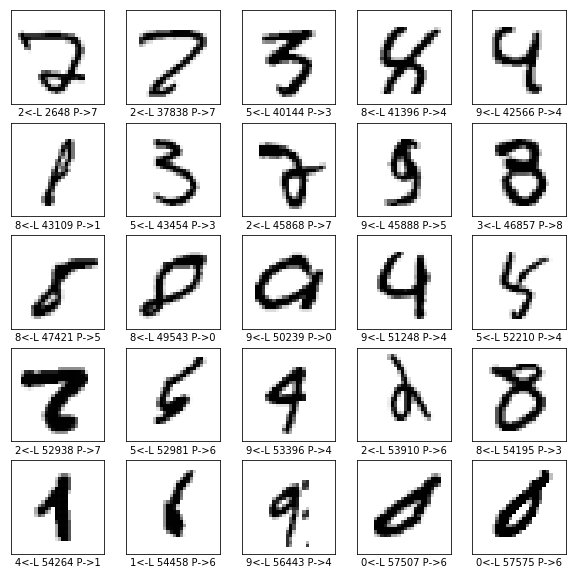

In [7]:
plt.figure(figsize=(10,10))
offset = 0

print("Low Entropy (The model is fairly certain of the prediction), but false images.")
for i in range(min(25, len(low_shannon_false))):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[low_shannon_false[i + offset]].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(str(np.argmax(y_train[low_shannon_false[i + offset]])) + "<-L "  + str(low_shannon_false[i]) +" P->" + str(np.argmax(all_acts[low_shannon_false[i + offset]])))
plt.show()



Prominent examples of potential mislabelleing


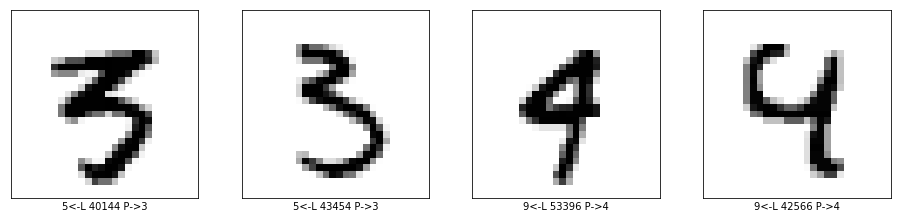

In [8]:
prominent_examples = [40144, 43454, 53396, 42566]
plt.figure(figsize=(20,20))
offset = 0

print("Prominent examples of potential mislabelleing")
for i in range(min(25, len(prominent_examples))):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[prominent_examples[i + offset]].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(str(np.argmax(y_train[prominent_examples[i + offset]])) + "<-L "  + str(prominent_examples[i]) +" P->" + str(np.argmax(all_acts[prominent_examples[i + offset]])))
plt.show()
